In [1]:
from alntk.alignment import Alignment, filter_gappy, filter_compact, write_to_fasta
from alntk.plotting import default_plot_style

import matplotlib.pyplot as plt

In [2]:
data_folder = '../data/'
color_cycle = default_plot_style()

# Making a compact alignment

*Written by Shoichi Yip. Last update: 28 November 2024.*

In this notebook we will adopt three different schemes of filtering out of sequences and positions.
It is necessary to reduce the number of columns in alignments, mainly for the following reasons:

1. Often the complexity of algorithms used in training generative models, to which we feed our alignment, scale at least quadratically with the number of columns. This means that we gain a lot in terms of complexity if we reduce the number of positions.
2. The synthesis of DNA is an extremely costly process, so having shorter sequences allows for cost reduction.

The filtering schemes that we will inspect are the following:

1. The **gappy out** scheme, which is the most commonly used scheme to get rid of gaps. It implies the removal of columns that go beyond a certain threshold in the fraction of gaps.
2. The **compact** scheme. This method removes sequences having uncommon residues (i.e. residues where most of the sequences have gaps) and then removes the entirely gapped columns.
3. The **iterative compact** scheme. This method takes the resulting alignment of the compact scheme, then perform again a compact filtering. This is performed iteratively.

The last two schemes affect the number of sequences, but having a smaller dataset might impair the training of models.
So we will reintroduce in the end all the sequences that were left out and they will be truncated according to the scheme.

In [3]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'new_aln.faa')
aln.print_report()

Number of sequences: 106557
Number of positions: 693


Let us store the gap per sequence and gap per position data from the original alignment.

In [4]:
orig_seq_gap = aln.get_seq_gap()
orig_pos_gap = aln.get_pos_gap()

## Gappy out scheme

Let us now filter out positions that have more than 80% of gaps.

In [5]:
aln_filter = filter_gappy(aln, 0.8)
aln.drop(aln_filter)
aln.print_report()

Number of sequences: 106557
Number of positions: 258


Let us store the gap per sequence and gap per position data from the compact alignment.

In [6]:
gappy_seq_gap = aln.get_seq_gap()
gappy_pos_gap = aln.get_pos_gap()

In [7]:
fig1_data = [
    {
        'data': orig_seq_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': gappy_seq_gap,
        'label': 'Gappy out aln',
        'color': color_cycle[1]
    }
]

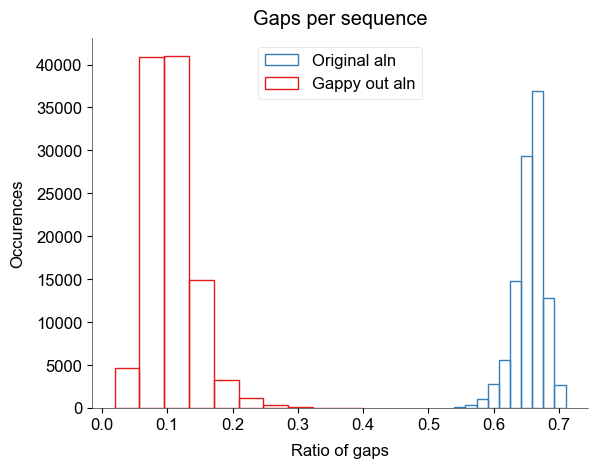

In [8]:
fig = plt.figure()
plt.title('Gaps per sequence')
for dataset in fig1_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

In [9]:
fig2_data = [
    {
        'data': orig_pos_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': gappy_pos_gap,
        'label': 'Gappy out aln',
        'color': color_cycle[1]
    }
]

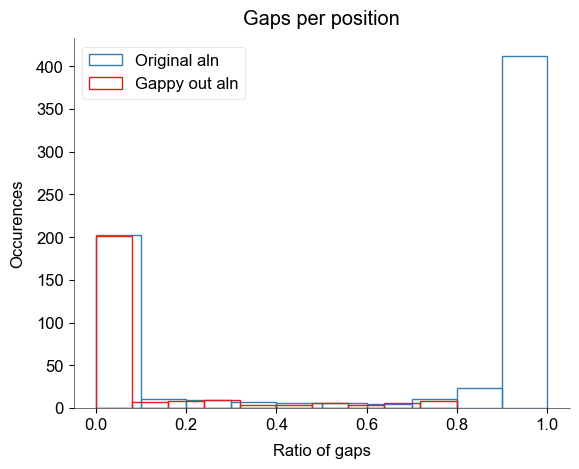

In [10]:
fig = plt.figure()
plt.title('Gaps per position')
for dataset in fig2_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

## Compact scheme

Let us now filter out sequences that have residues in positions with more than 95% gaps.

We restore all the positions and the sequences to the original alignment.

In [11]:
aln.reset_pos()
aln.reset_seq()
aln.print_report()

Number of sequences: 106557
Number of positions: 693


In [12]:
aln_filter = filter_compact(aln, 0.95)
aln.drop(aln_filter)
aln.print_report()

Number of sequences: 51255
Number of positions: 309


Let us store the gap per sequence and gap per position data from the compact alignment.

In [13]:
comp_seq_gap = aln.get_seq_gap()
comp_pos_gap = aln.get_pos_gap()

In [14]:
fig3_data = [
    {
        'data': orig_seq_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': comp_seq_gap,
        'label': 'Compact aln',
        'color': color_cycle[2]
    }
]

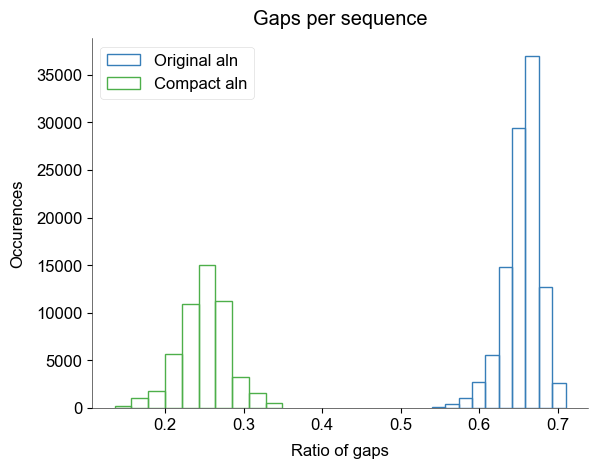

In [15]:
fig = plt.figure()
plt.title('Gaps per sequence')
for dataset in fig3_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

In [16]:
fig4_data = [
    {
        'data': orig_pos_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': comp_pos_gap,
        'label': 'Compact aln',
        'color': color_cycle[2]
    }
]

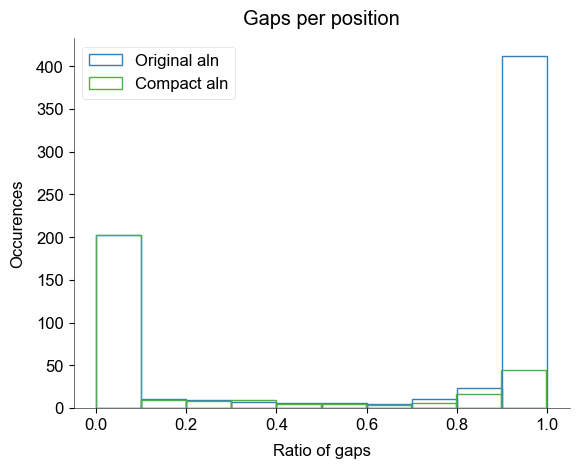

In [17]:
fig = plt.figure()
plt.title('Gaps per position')
for dataset in fig4_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

## Iterative compact scheme

Now let us iterate four times on the compact filtering scheme.

As before, we reset the alignment to the original one.

In [18]:
aln.reset_pos()
aln.reset_seq()
aln.print_report()

Number of sequences: 106557
Number of positions: 693


In [19]:
for i in range(0, 4):
    print(f"Compact filter - Iteration #{i}")
    aln_filter = filter_compact(aln, 0.95)
    aln.drop(aln_filter)
    aln.print_report()

Compact filter - Iteration #0
Number of sequences: 51255
Number of positions: 309
Compact filter - Iteration #1
Number of sequences: 31893
Number of positions: 279
Compact filter - Iteration #2
Number of sequences: 24397
Number of positions: 264
Compact filter - Iteration #3
Number of sequences: 21188
Number of positions: 260


Let us store the gap per sequence and gap per position data from the compact iterative alignment.

In [20]:
iter_seq_gap = aln.get_seq_gap()
iter_pos_gap = aln.get_pos_gap()

In [21]:
fig5_data = [
    {
        'data': orig_seq_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': iter_seq_gap,
        'label': 'Iterative compact aln',
        'color': color_cycle[3]
    }
]

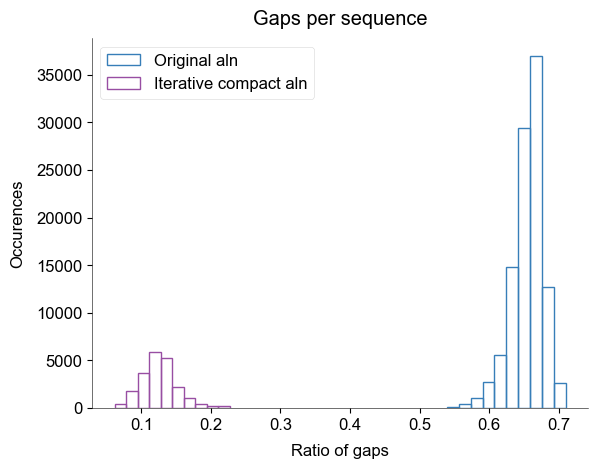

In [22]:
fig = plt.figure()
plt.title('Gaps per sequence')
for dataset in fig5_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

In [23]:
fig6_data = [
    {
        'data': orig_pos_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': iter_pos_gap,
        'label': 'Iterative compact aln',
        'color': color_cycle[3]
    }
]

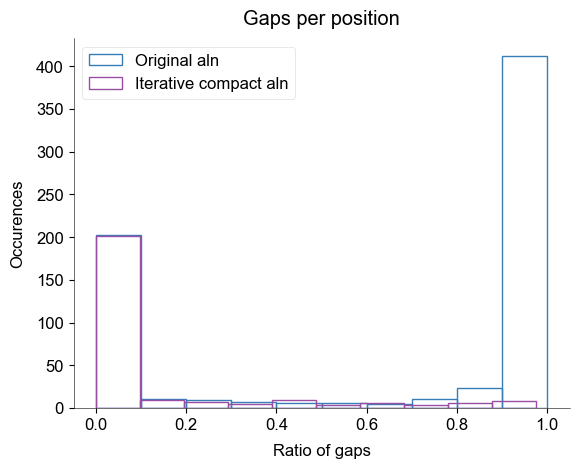

In [24]:
fig = plt.figure()
plt.title('Gaps per position')
for dataset in fig6_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

## Iterative compact scheme with all sequences

Let us now reintroduce all the sequences, but retain the trimming on the positions.

In [25]:
aln.reset_seq()
aln.print_report()

Number of sequences: 106557
Number of positions: 260


Let us store the gap per sequence and gap per position data from the compact iterative alignment with all the sequences.

In [26]:
iterall_seq_gap = aln.get_seq_gap()
iterall_pos_gap = aln.get_pos_gap()

Now that we have all the datasets, we can compare them.

In [27]:
fig7_data = [
    {
        'data': orig_seq_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': gappy_seq_gap,
        'label': 'Gappy out aln',
        'color': color_cycle[1]
    }, {

        'data': comp_seq_gap,
        'label': 'Compact aln',
        'color': color_cycle[2]
    }, {

        'data': iter_seq_gap,
        'label': 'Iterative compact aln',
        'color': color_cycle[3]
    }, {

        'data': iterall_seq_gap,
        'label': 'Iterative compact compact aln w/ all seq',
        'color': color_cycle[4]
    }
]

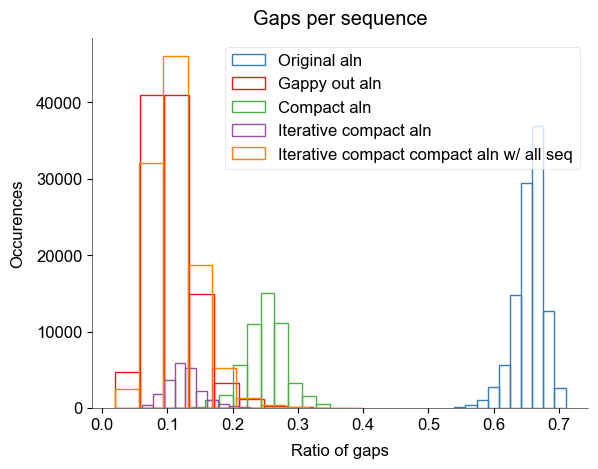

In [28]:
fig = plt.figure()
plt.title('Gaps per sequence')
for dataset in fig7_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

In [29]:
fig8_data = [
    {
        'data': orig_pos_gap,
        'label': 'Original aln',
        'color': color_cycle[0]
    }, {

        'data': gappy_pos_gap,
        'label': 'Gappy out aln',
        'color': color_cycle[1]
    }, {

        'data': comp_pos_gap,
        'label': 'Compact aln',
        'color': color_cycle[2]
    }, {

        'data': iter_pos_gap,
        'label': 'Iterative compact compact aln',
        'color': color_cycle[3]
    }, {

        'data': iterall_pos_gap,
        'label': 'Iterative compact compact aln w/ all seq',
        'color': color_cycle[4]
    }
]

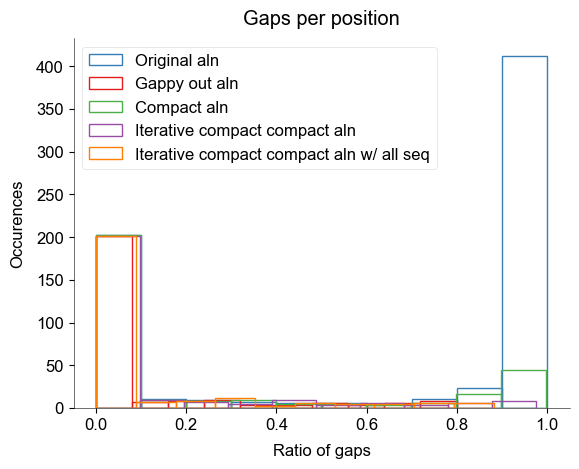

In [30]:
fig = plt.figure()
plt.title('Gaps per position')
for dataset in fig8_data:
    plt.hist(dataset['data'], label=dataset['label'], facecolor='none', edgecolor='#'+dataset['color'], linewidth=1)
plt.xlabel('Ratio of gaps')
plt.ylabel('Occurences')
plt.legend()
plt.show()

## Conclusion

We can see that the statistics of the gappy out scheme are similar to those of the iterative compact scheme with all sequences. However, the advantage of the latter scheme is that there is a higher number of sequences where we preserve the entirety of amino acids.

This is crucial, since there is evidence (unpublished experimental work by Yaakov Kleeorin, Clément Nizak and Olivier Rivoire) that the elimination of few residues that have little statistical and structural importance kill the enzymatic activity. Hence the goal is to keep the most amount of sequences untouched with respect to the original alignment.

In [31]:
write_to_fasta(aln, data_folder + 'iter_aln.faa')